# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.5 which is incompatible.


The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 1 (with a single agent) of the environment
env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
#env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726671e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:
env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 1.0099999774247408


When finished, you can close the environment.

In [6]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

### The agent to train our model is DDPG (Deep Deterministic Policy Gradient ) model 

This model is used to train the agents which  will have continuous action space. 

The Multi arm Joint will have 4 action values which are contiinuous 

So we have choosen this model 

The overall  Architecure of DDPG is 

 1) Actor:  policy network (2 neural nets local, target) used to give action by taking the state as input
 
 2) Critic: Value function Network (2 neural nets local, target) used to provide value fucntion for the action which will be used as critic to train the model 
 
 3) Replybuffer: This is used to be a offpolicy network training  arcchitecture 
 
So just like DQN we will start with random action by using the OU noise added to the action that we get from policy network during  training. Also i have added a decay factor to nosie so that we can reduce the amount exploration during end of training 

After that we will use that action and state to critic network to get value fucntion which will be used as critic, 

Then we backpropagate the error using that 






## Inorder to find best model we need to find best hyperparameters 

1)  learing rate for policy network and  value network 

2) Sigma for OU nosie for exploration 



In [6]:
from collections import deque
def hyper_search(env,  lrates, sigma, n_episodes=400):
    eps_end=0.01
    from Agent import Agent
    from collections import defaultdict
    scores = defaultdict(list)
    moving_scores = defaultdict(list)
    brain_name = env.brain_names[0]
    brain = env.brains[brain_name]
    env_info = env.reset(train_mode=False)[brain_name]
    states = env_info.vector_observations
    state_size = states.shape[1]
    action_size = brain.vector_action_space_size
    scores_deque = deque(maxlen=100)
    #print(state_size,action_size)
    for lt in lrates:
        for sig in sigma:
            score_string =  'my__' + str(lt)  + '__' + str(sig)
            agent = Agent(state_size=state_size, action_size=action_size, random_seed=0,lr=lt,sigma=sig)
            print("\n starting {}".format(score_string))
            for i_episode in range(1, n_episodes + 1):
              env_info = env.reset(train_mode=True)[brain_name]
              state = env_info.vector_observations
              agent.reset()
              score = 0
              while True:
                 action = agent.act(state)
                 env_info = env.step(action)[brain_name]
                 next_state = env_info.vector_observations[0]
                 reward = env_info.rewards[0]
                 done = env_info.local_done[0]
                 agent.step(state, action, reward, next_state, done)
                 state = next_state
                 score += reward
                 if done:
                     break
              # save most recent score
              #scores[score_string].append(score)  # save most recent score
              scores_deque.append(score)
              scores[score_string].append(score)
              print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}'.format(i_episode, np.mean(scores_deque),score), end="")
              if i_episode % 100 == 0:
                 print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}'.format(i_episode, np.mean(scores_deque),score))
                 moving_scores[score_string].append(np.mean(scores_deque))
                 
    return scores,moving_scores

###  Lets try diffrent hyper parameters 

Sigma : This is used for exploration. This will add random nosie to weight 
Learing Rate: used to control gradient updates 

 
we can improve this by adding bigger batch size this control the gradient  and makes the updates steady 
 
increaing batch will imporve model a lot  beacuse it make much better gradient upates.. 



In [7]:
lrates = [1e-4]
sigma = [0.05,0.1,0.2]

In [8]:
hyper_scores,hyper_moving_scores = hyper_search(env, lrates,sigma, n_episodes=300)


 starting my__0.0001__0.05
Episode 100	Average Score: 4.15	Score: 9.06
Episode 200	Average Score: 21.86	Score: 39.08
Episode 300	Average Score: 34.84	Score: 36.49

 starting my__0.0001__0.1
Episode 100	Average Score: 3.66	Score: 9.044
Episode 200	Average Score: 15.23	Score: 16.89
Episode 300	Average Score: 21.94	Score: 23.39

 starting my__0.0001__0.2
Episode 100	Average Score: 2.79	Score: 7.22
Episode 200	Average Score: 11.93	Score: 15.63
Episode 300	Average Score: 19.26	Score: 33.80


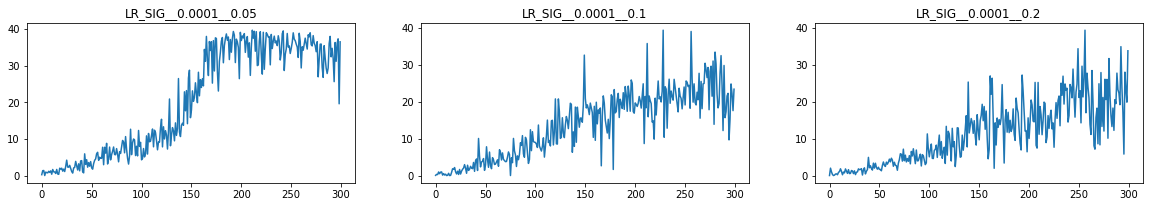

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline  

row=[1]
col=[1,2,3]
x_indx=1
y_indx=1
fig2 = plt.figure(figsize=(20,10))
for j in hyper_scores.keys():
    label = j.replace('my','LR_SIG')
    ax = fig2.add_subplot(3,3,x_indx)
    #plt.subplot(9,x_indx,y_indx)
    ax.plot(hyper_scores[j])
    ax.set_title(label)
    x_indx += 1
     
plt.show()

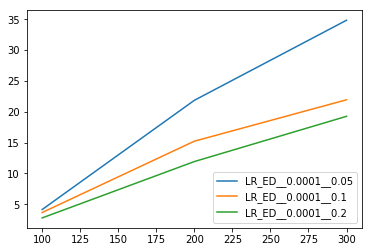

In [10]:
x=[100,200,300]
for j in hyper_scores.keys():
    label = j.replace('my','LR_ED')
    plt.plot(x,hyper_moving_scores[j],label=label)
plt.legend(loc='lower right')
plt.show()

### So hyperparameters for our final DDPG  model are 

Learning rate:  1e-4

Sigma(for OU noise): 0.05

Batch size: 256

So we will use these parameters and train the model for 600 episodes

The single agent is able to solve the probelem in 300 Episode

In [ ]:
from Agent import Agent
from collections import deque
import torch 
n_episodes = 300
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
env_info = env.reset(train_mode=False)[brain_name]
states = env_info.vector_observations
state_size = states.shape[1]
action_size = brain.vector_action_space_size
print(state_size,action_size)
agent = Agent(state_size=state_size, action_size=action_size, random_seed=0,lr=0.0001,sigma=0.05)
scores_deque = deque(maxlen=100)
scores = []
max_score = -np.Inf
avg_scrores = []
for i_episode in range(1, n_episodes + 1):
    env_info = env.reset(train_mode=True)[brain_name]
    state = env_info.vector_observations
    agent.reset()
    score = 0
    while True:
        action = agent.act(state)
        env_info = env.step(action)[brain_name]
        next_state = env_info.vector_observations[0]
        reward = env_info.rewards[0]
        done = env_info.local_done[0]
        agent.step(state, action, reward, next_state, done)
        state = next_state
        score += reward
        if done:
            break
    scores_deque.append(score)
    scores.append(score)
    print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}'.format(i_episode, np.mean(scores_deque), score),
          end="")
    if i_episode % 100 == 0:
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        avg_scrores.append(np.mean(scores_deque))
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))

33 4
Episode 100	Average Score: 4.68	Score: 12.41
Episode 200	Average Score: 23.10	Score: 37.16
Episode 295	Average Score: 32.96	Score: 37.47

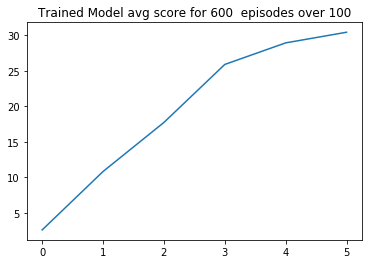

In [29]:
import matplotlib.pyplot  as plt
%matplotlib inline  
plt.plot(avg_scrores)
plt.title('Trained Model avg score for 600  episodes over 100')
plt.show()



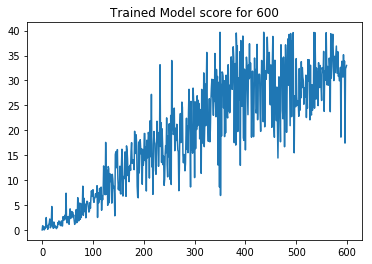

In [30]:
import matplotlib.pyplot  as plt
%matplotlib inline  
plt.plot(scores)
plt.title('Trained Model score for 600')
plt.show()

In [6]:
### lets make test run
import torch
from Agent import Agent
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
def trained_qmodel_run(env):
    brain_name = env.brain_names[0]
    brain = env.brains[brain_name]
    env_info = env.reset(train_mode=False)[brain_name]  # reset the environment
    # env_info = env.reset(train_mode=True)[brain_name]
    states = env_info.vector_observations  # get the current state (for each agent)
    num_agents = len(env_info.agents)
    state_size = states.shape[1]
    action_size = brain.vector_action_space_size
    agent = Agent(state_size=state_size, action_size=action_size,  random_seed=10,
                        sigma=0.05)
    action_size = brain.vector_action_space_size
    #print('Size of each action:', action_size)
    # initialize the score (for each agent)
    count = 0
    scores =  0
    while True:
        actions = agent.trained_act(states)  # select an action (for each agent)
        env_info = env.step(actions)[brain_name]  # send all actions to tne environment
        next_states = env_info.vector_observations[0]  # get next state (for each agent)
        rewards = env_info.rewards[0]  # get reward (for each agent)
        done = env_info.local_done[0]  # see if episode finished
        scores += env_info.rewards[0]  # update the score (for each agent)
        states = next_states  # roll over states to next time step
        if done:  # exit loop if episode finished
            break
    print('Total score   this episode: {} '.format(np.mean(scores)))

In [7]:
for i in range(10):
    trained_qmodel_run(env)

Total score   this episode: 39.30999912135303 
Total score   this episode: 36.849999176338315 
Total score   this episode: 31.859999287873507 
Total score   this episode: 36.13999919220805 
Total score   this episode: 39.519999116659164 
Total score   this episode: 38.01999915018678 
Total score   this episode: 22.369999499991536 
Total score   this episode: 32.8399992659688 
Total score   this episode: 34.91999921947718 
Total score   this episode: 39.08999912627041 


### Multi Agent Approch

Multi agent approch adds a lot of Trajectories .. This makes distributed approch as we collect data from diffrent  agents at same time.

Let try with same hyperparameters 



In [3]:
##lets try  to solve multi agnet probelm 

env1 = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

brain_name = env1.brain_names[0]
brain = env1.brains[brain_name]
# reset the environment
env_info = env1.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state .with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

env_info = env1.reset(train_mode=True)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env1.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state .with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726624e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]
Total score (averaged over agents) this episode: 0.12149999728426338


In [4]:
import numpy as np
from Agent_multi import Agent_multi
import torch
from collections import deque,defaultdict
def train_the_agent(env,n_episodes = 400):
    brain_name = env.brain_names[0]
    brain = env.brains[brain_name]
    env_info = env.reset(train_mode=False)[brain_name]
    states = env_info.vector_observations
    state_size = states.shape[1]
    action_size = brain.vector_action_space_size
    #print(state_size, action_size)
    num_agents = len(env_info.agents)
    agent = Agent_multi(state_size=state_size, action_size=action_size, number_agents=num_agents,random_seed=10,sigma=0.05)
    scores_deque = deque(maxlen=100)
    scores_overall = []
    max_score = -np.Inf
    individual_scores = defaultdict(list)
    individual_score_deque = defaultdict(list)
    for i_episode in range(1, n_episodes + 1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations
        agent.reset()
        scores = np.zeros(num_agents)
        time = 0
        while True:
            action = agent.act(state)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations
            reward = env_info.rewards
            done = env_info.local_done
            time += 1
            agent.step(state, action, reward, next_state, done,time)
            state = next_state
            scores += reward
            if np.any(done):
                break
        agnet_num = 0
        score = np.mean(scores)
        scores_deque.append(score)
        scores_overall.append(score)
        for i in scores:
            individual_scores[agnet_num].append(i)
            agnet_num += 1
        agnet_num = 0
        for i in scores:
            individual_score_deque[agnet_num].append(i)
            agnet_num += 1
        agents_avg = [np.mean(individual_score_deque[i]) for i in individual_score_deque.keys()]
        print('\rEpisode {}\tAverage Score: {:.2f} \tScore: {:.2f}  Max: {:.2f} Min: {:.2f} Avg Agent stats: Max: {:.2f}  Min: {:.2f} '.format(i_episode, np.mean(scores_deque), score, np.max(scores),np.min(scores),np.max(agents_avg),np.min(agents_avg)),
              end="")
        if i_episode % 100 == 0:
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor_multi.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic_multi.pth')
            print('\rEpisode {}  Average Score: {:.2f}   Max: {:.2f}  Min: {:.2f} Avg Agent stats: Max: {:.2f}  Min: {:.2f} AVG : {:.2f} \t\t'.format(i_episode, np.mean(scores_deque), np.max(scores_deque),np.min(scores_deque),np.max(agents_avg),np.min(agents_avg),np.mean(agents_avg)))
            individual_score_deque = defaultdict(list)
    return scores_overall,individual_scores

In [5]:
scores_overall,individual_scores = train_the_agent(env1,)

Episode 100  Average Score: 6.66   Max: 17.62  Min: 0.25 Avg Agent stats: Max: 7.06  Min: 6.16 AVG : 6.66 		
Episode 200  Average Score: 29.98   Max: 36.90  Min: 17.87 Avg Agent stats: Max: 30.63  Min: 28.93 AVG : 29.98 		
Episode 300  Average Score: 35.91   Max: 38.07  Min: 33.12 Avg Agent stats: Max: 36.38  Min: 35.34 AVG : 35.91 		
Episode 400  Average Score: 35.56   Max: 37.76  Min: 31.14 Avg Agent stats: Max: 36.02  Min: 35.07 AVG : 35.56 		


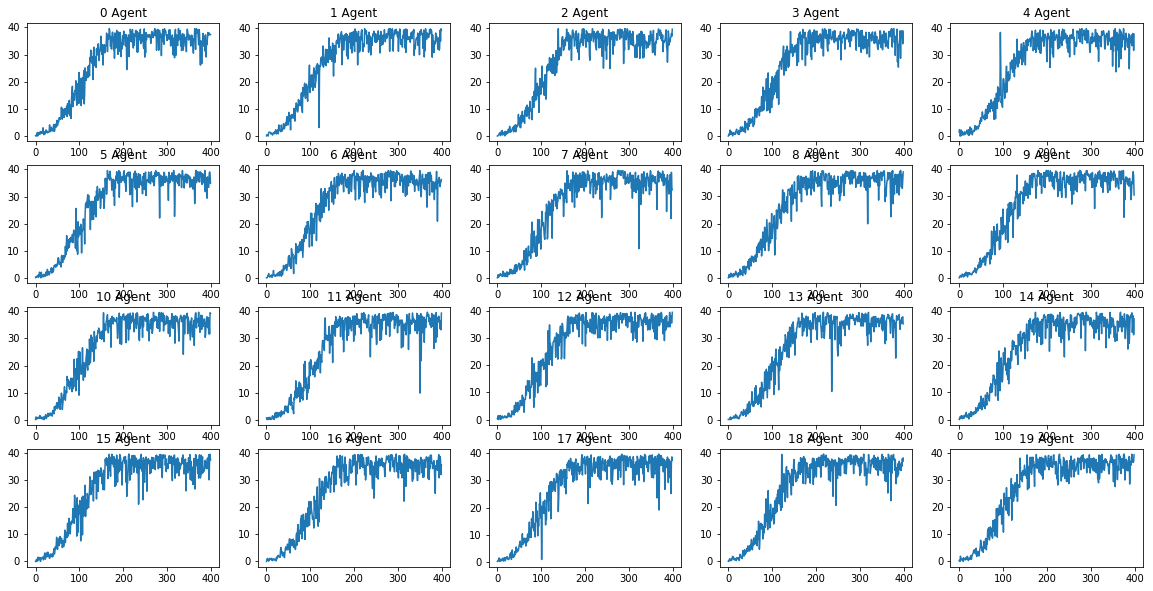

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline  

x_indx  =1 
fig2 = plt.figure(figsize=(20,10))
for j in individual_scores.keys():
    label = str(j) + " Agent"
    ax = fig2.add_subplot(4,5,x_indx)
    #plt.subplot(9,x_indx,y_indx)
    ax.plot(individual_scores[j])
    ax.set_title(label)
    x_indx += 1
     
plt.show()

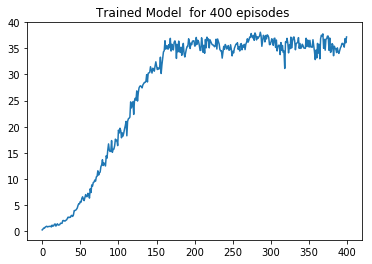

In [8]:
import matplotlib.pyplot  as plt
%matplotlib inline  
plt.plot(scores_overall)
plt.title('Trained Model  for 400 episodes ')
plt.show()



In [4]:
import numpy as np
from Agent_multi import Agent_multi
import torch

In [5]:
def trained_qmodel_run_multi(env):
    brain_name = env.brain_names[0]
    brain = env.brains[brain_name]
    env_info = env.reset(train_mode=False)[brain_name]  # reset the environment
    # env_info = env.reset(train_mode=True)[brain_name]
    states = env_info.vector_observations  # get the current state (for each agent)
    num_agents = len(env_info.agents)
    state_size = states.shape[1]
    action_size = brain.vector_action_space_size
    agent = Agent_multi(state_size=state_size, action_size=action_size, number_agents=num_agents, random_seed=10,
                        sigma=0.05)
    scores = np.zeros(num_agents)
    action_size = brain.vector_action_space_size
    #print('Size of each action:', action_size)
    # initialize the score (for each agent)
    count = 0
    scores = np.zeros(num_agents)
    while True:
        actions = agent.trained_act(states)  # select an action (for each agent)
        env_info = env.step(actions)[brain_name]  # send all actions to tne environment
        next_states = env_info.vector_observations  # get next state (for each agent)
        rewards = env_info.rewards  # get reward (for each agent)
        dones = env_info.local_done  # see if episode finished
        scores += env_info.rewards  # update the score (for each agent)
        states = next_states  # roll over states to next time step
        if np.any(dones):  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {} , individual scores: {}'.format(np.mean(scores),scores))
    #env.close()

In [6]:
trained_qmodel_run_multi(env1)

Total score (averaged over agents) this episode: 37.51099916156382 , individual scores: [ 39.10999913  32.98999926  38.53999914  34.25999923  39.60999911
  38.64999914  28.50999936  39.38999912  38.21999915  39.58999912
  39.01999913  38.47999914  38.56999914  36.72999918  39.60999911
  39.43999912  35.6399992   39.50999912  35.04999922  39.29999912]


In [6]:
for i in range(5):
    trained_qmodel_run_multi(env1)

Total score (averaged over agents) this episode: 37.801999155059455 , individual scores: [ 39.10999913  31.06999931  39.53999912  38.13999915  39.60999911
  39.49999912  28.38999937  39.38999912  37.85999915  39.44999912
  39.58999912  36.94999917  38.69999913  38.03999915  39.60999911
  39.43999912  36.99999917  39.50999912  36.67999918  38.45999914]
Total score (averaged over agents) this episode: 36.71099917944521 , individual scores: [ 38.93999913  39.46999912  34.69999922  39.00999913  35.21999921
  39.29999912  30.05999933  32.91999926  29.80999933  38.79999913
  34.74999922  37.08999917  39.56999912  39.41999912  39.59999911
  39.55999912  38.73999913  30.94999931  37.48999916  38.81999913]
Total score (averaged over agents) this episode: 36.41349918609485 , individual scores: [ 36.76999918  39.27999912  39.47999912  37.88999915  39.56999912
  39.28999912  39.10999913  35.9699992   39.57999912  27.22999939
  39.53999912  37.03999917  29.25999935  39.37999912  38.63999914
  33.63